# #0 Critique the most important figure from a seminal paper in your field

<center>
<img src=hw_2_data/p_value_drop.png width="400"></img>
</center>

# #1 Reproduce one of your old published-paper quality plots with *Bokeh*.

UNFORTUNATELY skipped.

As an undergrad, I don't have any published-paper, nor a plot in that. 
In addition, due to my procrastination, I started this homework on Sunday and I chose not to email Prof./GSI as they were not responsible for being responsive 24/7. 

I would definitely start this week's homework much earlier. 

# #2 Reproduce in *matplotlib* the provided plot *stocks.png*

In [23]:
# Import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# -*- coding: utf-8 -*-

In [2]:
# Load in data/text
ny_temp = np.loadtxt('hw_2_data/ny_temps.txt', skiprows=1)
google_stock = np.loadtxt('hw_2_data/google_data.txt', skiprows=1)
yahoo_stock = np.loadtxt('hw_2_data/yahoo_data.txt', skiprows=1)

In [3]:
#google_stock

In [4]:
google_stock_date, google_stokc_value = google_stock[:, 0], google_stock[:, 1]
yahoo_stock_date, yahoo_stock_value = yahoo_stock[:, 0], yahoo_stock[:, 1]
ny_temp_date, ny_temp_value = ny_temp[:, 0], ny_temp[:, 1]

In [5]:
#ny_temp_date
#ny_temp_value

In [6]:
from matplotlib.ticker import MultipleLocator

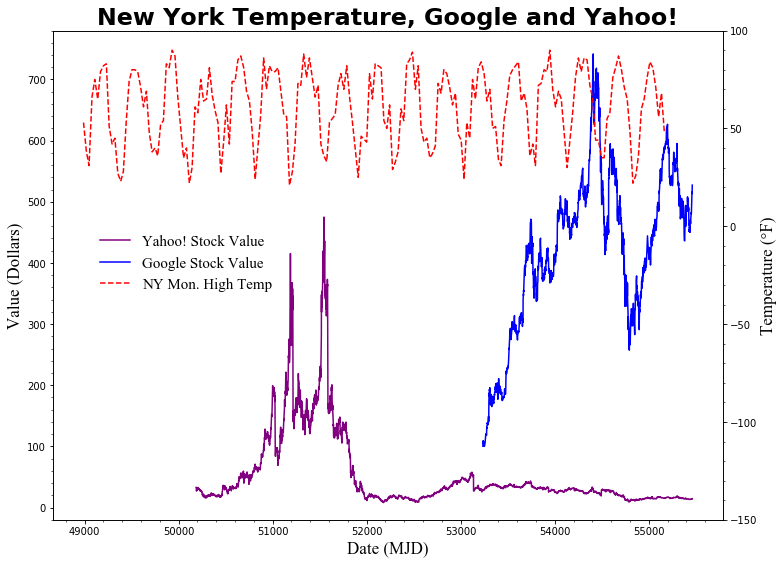

In [118]:
fontsize=17
fig, ax1 = plt.subplots(figsize=[12, 9])

leg1 = ax1.plot(yahoo_stock_date, yahoo_stock_value, 'purple', label='Yahoo! Stock Value')
leg2 = ax1.plot(google_stock_date, google_stokc_value, 'blue', label='Google Stock Value')
ax1.set_xlabel('Date (MJD)', fontsize=fontsize, fontname='Times New Roman')
ax1.set_ylabel('Value (Dollars)', fontsize=fontsize, fontname='Times New Roman')

# set axis label range
ax1.set_ylim([-20, 780])
ax1.set_xlim([49000, 55000])

# add minor ticks
ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.yaxis.set_minor_locator(MultipleLocator(20))

# set font for title
font_TNR_notwork = {'family':'Times New Roman', 'color':  'black', 'weight': 1000 , 'size': fontsize*1.85}
# for some reason, if using Times New Roman font, title won't get bolded
font_SS_bold = {'family': 'sans-serif','color':  'black', 'weight': 'bold','size': fontsize*1.4}
ax1.set_title('New York Temperature, Google and Yahoo!', fontdict=font_SS_bold)

# turn off major and minor ticks from upper x axis
ax1.tick_params(axis='x', which='both', top='off')        

ax2 = ax1.twinx()
leg3 = ax2.plot(ny_temp_date, ny_temp_value, 'r--', label='NY Mon. High Temp')
# -*- coding: utf-8 -*-
ax2.set_ylabel('Temperature (°F)', fontsize=fontsize, fontname='Times New Roman')
ax2.set_ylim([-150, 100])
ax2.yaxis.set_minor_locator(MultipleLocator(10))

# add legend
legs = leg1+leg2+leg3
labs = [l.get_label() for l in legs]
legends = ax1.legend(lns, labs, loc= 6, frameon=False, fontsize=15) #fontname="Times New Roman" 

# Get the bounding box of the original legend
bb = legends.get_bbox_to_anchor().inverse_transformed(ax1.transAxes)

# Change to location of the legend. 
Offset = 0.05
bb.x0 += Offset
bb.y0 += Offset
legends.set_bbox_to_anchor(bb, transform = ax1.transAxes)

plt.setp(legends.texts, family='Times New Roman')
plt.show()

**Remaining problems**: 
   - The title (as commented in the code) cannot get bolded when using Times New Roman font. I "stackoverflowed" and checked the matplotlib document a lot but didn't find a solution. Some other people are experiencing, all texts in TNR are bold and cannot get back to regular.
   - The datasets appear to be different from the ones used to generate the provided graph. E.g. Yahoo two peaks both > 400 in the reproduced one, but 1st one is below 400 in the provided.